# Project 1 - Market Basket Analysis for E-Commerce
### by Azubuogu Peace Udoka

### Table of Content
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#data">Understanding the Dataset</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#ques">Calculating Metrics</a></li>
<li><a href="#conc">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Background
As a data analyst at a retail company, I have access to a dataset containing customer transactions. The task is to perform market basket analysis to uncover patterns in customer purchasing behavior. By identifying which products  tend  to  be  bought  together,  the  company  can  make  informed  decisions  to  improve  sales  and  customer satisfaction.

### Questions
In the course of this analysis, the following questions will be answered:

1. What are the most frequently purchased items?

2. What are the least frequently purchased items?

3. Which items are commonly bought together in a single transaction?

4. Are there items that customers are likely to buy after viewing a particular product?




Let's dive right in!

In [92]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#set general style of plots
sns.set(rc = {'figure.figsize':(20,8)}, style="white", font_scale=1.5)

#import transaction encoder function and apriori from mlxtend. Ensure mlxtend is installed before running
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

import warnings
warnings.simplefilter("ignore")

<a id='data'></a>
### Understanding the Dataset

In [2]:
#load dataset
data = pd.read_csv("Market Basket Analysis - Groceries_dataset.csv")
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns')

There are 38765 rows and 3 columns


In [3]:
# view first few rows
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


### Dataset Description
The dataset contains information about customer transactions. There are 38765 rows of customer transactions and 3 columns:
- Member_number: This is the unique identifier for  customers. Note, a customer may perform multiple transactions. 
- Date: This is the date at which the transaction was done.
- itemDescription: This is the item bought.


<a id='wrangling'></a>
## Data Wrangling
To improve efficiency, the column names will be replaced with more intuitive names.

- Member_number will be changed to cust_id.

- itemDescription will be changed to <b>item</b>.


In [4]:
# renaming columns
data.rename(columns={"Member_number":"cust_id", "itemDescription":"item"},inplace= True)

In [45]:
# checking for mmissing values
data.isnull().sum()

cust_id    0
Date       0
item       0
dtype: int64

In [46]:
# checking for duplicates
data.duplicated().sum()

759

There are 759 duplicates. These will be removed to improve accuracy.

In [48]:
# filtering data to remove duplicates
data = data[data.duplicated()==False]
data

,cust_id,Date,item
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [49]:
# checking for number of unique items sold
data.item.nunique()

167

There are 167 different items being bought.

To know the items bought together, group the data by date and then by cust_id. This will display the items bought by a customer on the same day. 

The number of each item bought is not of use to us. We only need to know the items bought together. To show this information in a more concise manner, rearrange the dataframe such that items bought together by each customer appears on the same row, separated by commas


In [7]:
# grouping data by customers
new_data = data.groupby(["Date","cust_id"], as_index=False)['item'].agg(','.join)
new_data

,Date,cust_id,item
0,01-01-2014,1249,"citrus fruit,coffee"
1,01-01-2014,1381,"curd,soda"
2,01-01-2014,1440,"other vegetables,yogurt"
3,01-01-2014,1659,"specialty chocolate,frozen vegetables"
4,01-01-2014,1789,"hamburger meat,candles"
...,...,...,...
14958,31-10-2015,4322,"brown bread,chocolate"
14959,31-10-2015,4675,"pip fruit,pastry"
14960,31-10-2015,4773,"salty snack,other vegetables,yogurt,other vege..."
14961,31-10-2015,4882,"tropical fruit,pickled vegetables"


In [8]:
# convert items column to a list of lists to enable onehot encoding
transactions = new_data["item"].apply(lambda x: x.split(','))
transactions = list(transactions)

In [9]:
# instantiate the transaction encoder and one-hot encode the data
encoder = TransactionEncoder().fit(transactions)
onehot = encoder.transform(transactions)
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
onehot

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<a id='ques'></a>
## 1. What are the most frequently purchased items? 
The most frequently bougth items are items with high support.

### Calculating Support

In [10]:
support = onehot.mean()
support.sort_values(ascending = False)

whole milk               0.157923
other vegetables         0.122101
rolls/buns               0.110005
soda                     0.097106
yogurt                   0.085879
                           ...   
frozen chicken           0.000334
bags                     0.000267
baby cosmetics           0.000200
kitchen utensil          0.000067
preservation products    0.000067
Length: 167, dtype: float64

The results above show that the whole milk is the most frequently bought item while preservation products are the least bought. 

Visualizing this information to show most frequently bought items.

In [11]:
# convert to dataframe
df = pd.DataFrame(support, columns = {"support"})
df = df.rename_axis("item").reset_index()
df

,item,support
0,Instant food products,0.004010
1,UHT-milk,0.021386
2,abrasive cleaner,0.001470
3,artif. sweetener,0.001938
4,baby cosmetics,0.000200
...,...,...
162,white bread,0.023993
163,white wine,0.011696
164,whole milk,0.157923
165,yogurt,0.085879


In [12]:
# sort dataframe and top ten
topfreq = df.sort_values(by="support", ascending= False).head(10)
topfreq

,item,support
164,whole milk,0.157923
102,other vegetables,0.122101
122,rolls/buns,0.110005
138,soda,0.097106
165,yogurt,0.085879
123,root vegetables,0.069572
156,tropical fruit,0.067767
12,bottled water,0.060683
130,sausage,0.060349
30,citrus fruit,0.053131


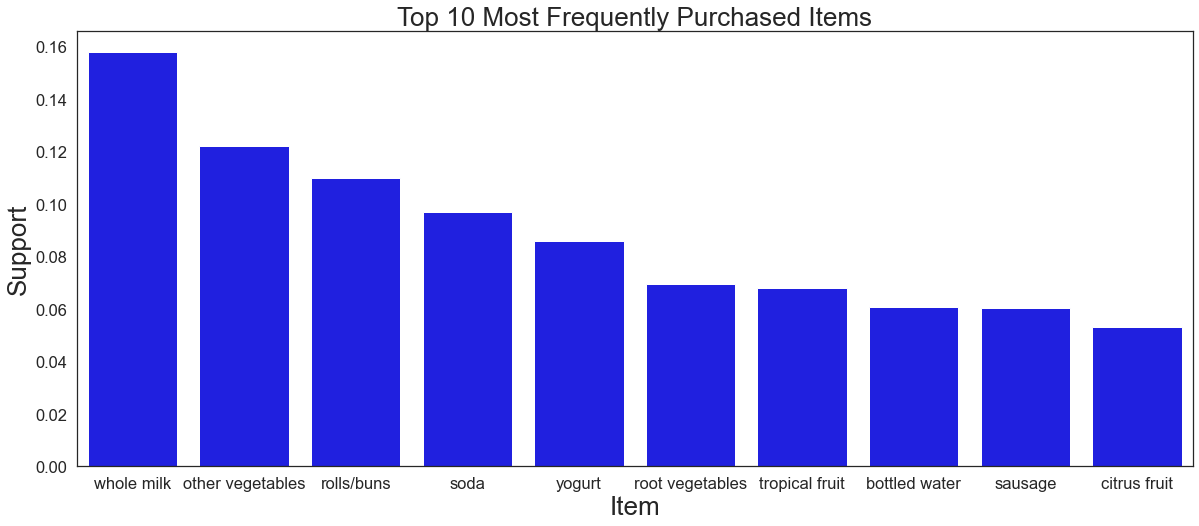

In [93]:
# plotting top 10 most frequently purchased items
sns.barplot(data = topfreq, x = "item", y="support", color = "blue");
plt.title('Top 10 Most Frequently Purchased Items', fontsize=26);
plt.xlabel("Item", fontsize =26);
plt.ylabel("Support", fontsize =26);

## 2. What are the least frequently purchased items?
These are items with the lowest support.

In [14]:
# sorting dataframe and getting lowest ten
leastfreq = df.sort_values(by="support", ascending= False).tail(10)
leastfreq

,item,support
161,whisky,0.000535
126,salad dressing,0.000401
86,make up remover,0.000334
155,toilet cleaner,0.000334
57,frozen chicken,0.000334
124,rubbing alcohol,0.000334
5,bags,0.000267
4,baby cosmetics,0.000200
79,kitchen utensil,0.000067
114,preservation products,0.000067


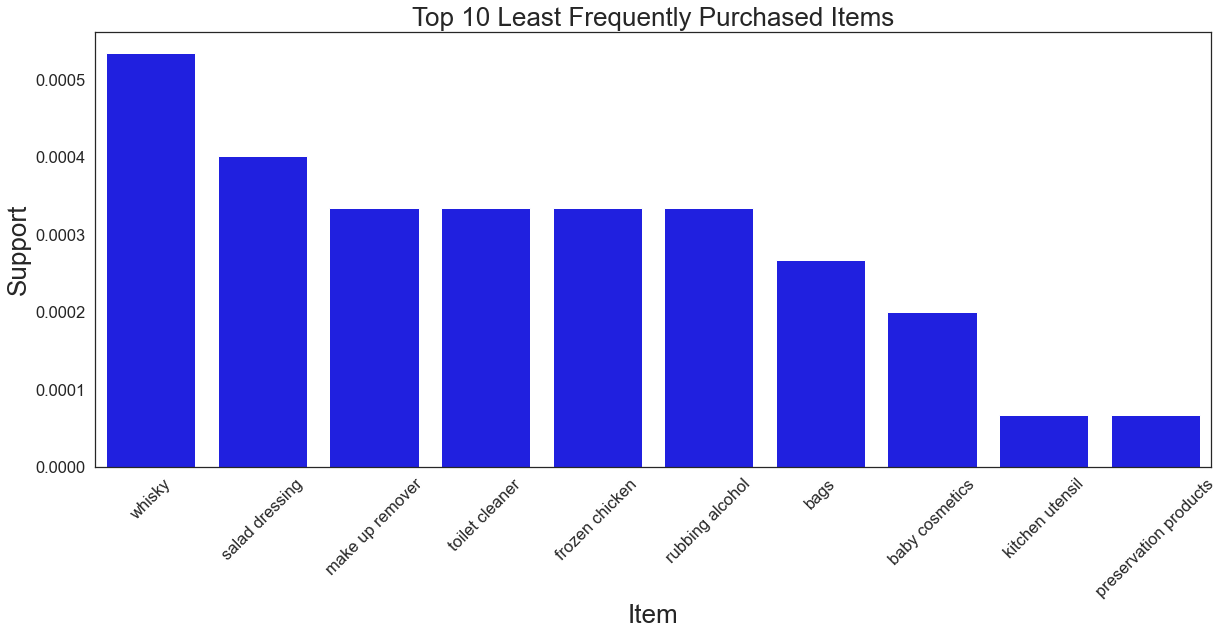

In [94]:
# plotting least frequently purchased items
sns.barplot(data = leastfreq, x = "item", y="support", color = "blue");
plt.title('Top 10 Least Frequently Purchased Items', fontsize=26);
plt.xlabel("Item", fontsize =26);
plt.ylabel("Support", fontsize =26);
plt.xticks(rotation=45);

## 3. Which items are commonly bought together in a single transaction?

These are items with lift greater than 1. To compute this metric, some aggregations and pruning need to be done.

<b> Note</b>: Because there are too many items being sold, there will be a very large possible combination of sets of items. To perform proper analysis, use the Apriori principle to reduce the number of sets of items. This works by pruning all subsets of infrequent sets and retaining all frequent sets and subsets.

In [16]:
# summary statistics
support.describe()

count    167.000000
mean       0.015210
std        0.023381
min        0.000067
25%        0.002038
50%        0.005681
75%        0.017644
max        0.157923
dtype: float64

From the summary statistics of the support of the items, it is seen that the median support value is about 0.005. This will be used as the support threshold.  That is, all items with support values above 0.05 will be considered as frequent.

In [17]:
# applying Apriori algorithm
freq_items = apriori(onehot, min_support = 0.005, use_colnames = True)
len(freq_items)

126

In [18]:
freq_items

,support,itemsets
0,0.021386,(UHT-milk)
1,0.008087,(baking powder)
2,0.033950,(beef)
3,0.021787,(berries)
4,0.016574,(beverages)
...,...,...
121,0.011629,"(whole milk, soda)"
122,0.005814,"(yogurt, soda)"
123,0.008220,"(tropical fruit, whole milk)"
124,0.005213,"(yogurt, tropical fruit)"


In [19]:
# identify rules with a minimum support threshold of 0.005
rules = association_rules(freq_items, metric = "support", min_threshold = 0.005)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
1,(whole milk),(bottled beer),0.157923,0.045312,0.007151,0.045281,0.999330,-0.000005,0.999968,-0.000795
2,(other vegetables),(bottled water),0.122101,0.060683,0.005480,0.044882,0.739619,-0.001929,0.983457,-0.286230
3,(bottled water),(other vegetables),0.060683,0.122101,0.005480,0.090308,0.739619,-0.001929,0.965051,-0.272617
4,(whole milk),(bottled water),0.157923,0.060683,0.007151,0.045281,0.746196,-0.002432,0.983868,-0.287708
...,...,...,...,...,...,...,...,...,...,...
69,(whole milk),(tropical fruit),0.157923,0.067767,0.008220,0.052052,0.768108,-0.002482,0.983422,-0.263904
70,(yogurt),(tropical fruit),0.085879,0.067767,0.005213,0.060700,0.895720,-0.000607,0.992477,-0.112970
71,(tropical fruit),(yogurt),0.067767,0.085879,0.005213,0.076923,0.895720,-0.000607,0.990298,-0.111019
72,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525


In [20]:
# filter to get items commonly bought together
items_bought_together = rules[rules['lift']>1]
items_bought_together[['antecedents','consequents']]

,antecedents,consequents
12,(other vegetables),(frankfurter)
13,(frankfurter),(other vegetables)
54,(sausage),(soda)
55,(soda),(sausage)
58,(sausage),(yogurt)
59,(yogurt),(sausage)


These items are commonly bought together.

## 4. Are there items that customers are likely to buy after viewing a particular product?

These are sets of items with high confidence. That is, if A, then B.


In [22]:
# summary statistics
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,0.100394,0.100394,0.007229,0.082724,0.830099,-0.001661,0.980537,-0.185650
std,0.040823,0.040823,0.002439,0.034744,0.103803,0.001168,0.014098,0.110415
min,0.037091,0.037091,0.005012,0.031739,0.621522,-0.004446,0.944615,-0.409559
25%,0.067767,0.067767,0.005480,0.052101,0.768108,-0.002432,0.971885,-0.259307
50%,0.097106,0.097106,0.006282,0.078144,0.815816,-0.001476,0.979938,-0.203230
75%,0.122101,0.122101,0.008087,0.106360,0.855703,-0.000845,0.989940,-0.149847
max,0.157923,0.157923,0.014837,0.157817,1.116150,0.000565,1.016420,0.118536


From the summary statistics above, the median confidence is 0.07. This will be used as minimum confidence threshold to prune the dataset to know which items are likely to be bought after viewing a particular item

In [28]:
# filter to get items with high confidence
items_with_high_confidence = rules[rules["confidence"]>0.07]
items_with_high_confidence[['antecedents','consequents']]

,antecedents,consequents
0,bottled beer,whole milk
3,bottled water,other vegetables
5,bottled water,whole milk
6,canned beer,whole milk
9,citrus fruit,whole milk
10,domestic eggs,whole milk
13,frankfurter,other vegetables
14,frankfurter,whole milk
16,newspapers,whole milk
18,rolls/buns,other vegetables


The table above shows items which the consequents are commonly bought after viewing the antecedent and vice versa.

This list is quite long and difficult to get information at first glance. We can visualise this wth a heatmap.

C:\ProgramData\Anaconda3\New folder (3)\lib\site-packages\seaborn\matrix.py:70: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(data.shape, np.bool)
C:\ProgramData\Anaconda3\New folder (3)\lib\site-packages\seaborn\matrix.py:80: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.bool)


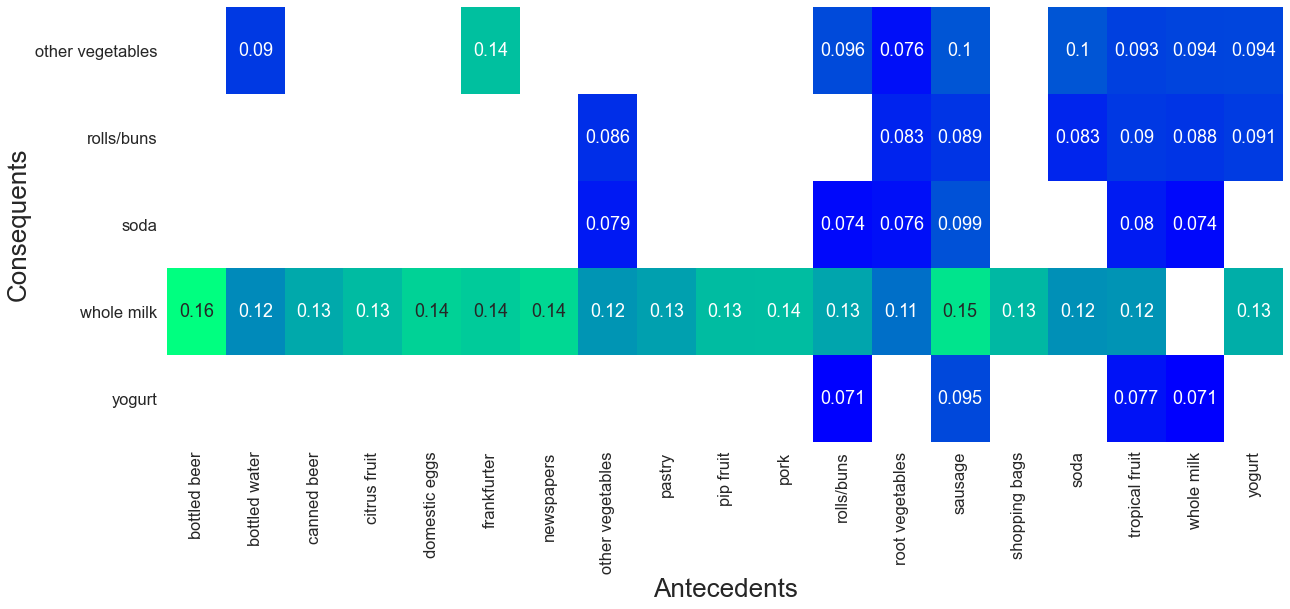

In [91]:
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = items_with_high_confidence.pivot(index = 'consequents', 
                   columns = 'antecedents', values= 'confidence')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True, cbar = False, cmap = 'winter');
plt.xlabel("Antecedents", fontsize =26);
plt.ylabel("Consequents", fontsize =26);

From the heatmap above, Whole Milk, which is the most frequently bought item, is also an item with high confidence with a lot of other products. This means that customers usually buy these other products after buying whole milk. Other vegetables, rolls/buns, soda and yoghurt are also items with high confidence with other items.

<a id='conc'></a>
## Conclusions

From the analysis conducted, the following conclusions have been made:

1. The most frequently purchased items are whole milk, other vegetables, rolls/buns, soda, yogurt, root vegetables, tropical fruit, bottled water, sausage, citrus fruit.
2. The least frequently purchased items are whisky, salad dressing, make up remover, toilet cleaner, frozen chicken, rubbing alcohol, bags, baby cosmetics, kitchen utensil, preservation products.
3. The following items are most commonly bought together:
 - (other vegetables)	and (frankfurter)
 - (sausage) and (soda)
 - (sausage) and (yogurt)
4. Whole milk, other vegetables, rolls/buns, soda, yogurt show high confidence with other products.
Thus, if they are bought, there's a possibility of buying the next viewed item.

## Recommendations
 Based on the conclusions, these are my recomemdations.
 
<b> A. Promote complementary items (items commonly bought together) together.</b> This can be done by:
 1. Implementing a promotion offering a discount when customers buy these complementary items together, thus encouraging larger transactions.
 2.  Enhancing the website's recommendation engine to display complementary pairs during purchase or during checkout, thus increasing the chance of cross-selling.
 
 
<b> B. Highlight high-support, high-confidence items. </b>This can be done by:
 3. Emphasizing whole milk, other vegetables, rolls/buns, soda, and yogurt as potential triggers for further purchases. Consider placing them on the homepage to capture attention and encourage immediate purchase..
 4. Featuring these items in targeted advertising campaigns.
 5. Offering personalized discounts based on customer purchase history. For example, if a customer has previously purchased whole milk and other vegetables, they could receive a discount on related products
 6. Implementing a real-time inventory tracking system to ensure accurate stock levels and prevent out-of-stock situations for frequently purchased items.
 
<b>C. Targeted promotions for low-frequency items by:</b>
 7. Implementing targeted promotions for items less frequently purchased, such as whisky, salad dressing, makeup remover, toilet cleaner, frozen chicken, rubbing alcohol, bags, baby cosmetics, kitchen utensils, and preservation products. These promotions could include discounts, coupons, or product samples to encourage trial and increase their visibility among customers.
 
 